# messing_around
Noah Stiegler

6/10/24

Start to get a feel for the dataset and see what's useful.

Looking at data from all beams and incoherent and phase_center and figuring out the differences!

## Setup

In [3]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from astropy import units as u
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.time import Time

In [4]:
# Read in the data

# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1" or hostname == "blpc2":
    full_dataset_path = "/datax/scratch/nstieg/25GHz_higher.pkl"
    coherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_coherent.pkl"
    incoherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_incoherent.pkl"
elif hostname == "cosmic-gpu-1":
    full_dataset_path = "/mnt/cosmic-gpu-1/data0/nstiegle/25GHz_higher.pkl"
else:
    raise Exception("Data path not known")

# Read in data
# coherent = pd.read_pickle(coherent_dataset_path)
# incoherent = pd.read_pickle(incoherent_dataset_path)
df = pd.read_pickle(full_dataset_path)

In [3]:
# See how many rows and columns the df has
print(df.shape)
num_rows = df.shape[0]
num_cols = df.shape[1]

(31208910, 29)


In [7]:
len(df.file_uri.unique())

125468

In [4]:
# Save the human readable times
df["tstart_h"] = Time(df["tstart"], format="mjd").datetime

## Look at what's in the file

In [20]:
# Look at what's in the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31208910 entries, 0 to 31208909
Data columns (total 30 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   beam_id                  int64         
 2   observation_id           int64         
 3   tuning                   object        
 4   subband_offset           int64         
 5   file_uri                 object        
 6   file_local_enumeration   int64         
 7   signal_frequency         float64       
 8   signal_index             int64         
 9   signal_drift_steps       int64         
 10  signal_drift_rate        float64       
 11  signal_snr               float64       
 12  signal_coarse_channel    int64         
 13  signal_beam              int64         
 14  signal_num_timesteps     int64         
 15  signal_power             float64       
 16  signal_incoherent_power  float64       
 17  source_name              

In [21]:
print(f"{'Column Name':<26} {'Typical Data':<26} {'Type'}")
print("-"*80)
for col in df.columns:
    print(f"{col:<26} {df[col][0]:<26} {type(df[col][0])}")

Column Name                Typical Data               Type
--------------------------------------------------------------------------------
id                         900273190                  <class 'numpy.int64'>
beam_id                    455656                     <class 'numpy.int64'>
observation_id             13232                      <class 'numpy.int64'>
tuning                     AC                         <class 'str'>
subband_offset             704                        <class 'numpy.int64'>
file_uri                   /mnt/cosmic-storage-2/data1/vla_target/23A-362.sb43789194.eb44583327.60212.544836180554/23A-362.sb43789194.eb44583327.60212.544836180554.9.1/23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.raw.seticore.hits <class 'str'>
file_local_enumeration     0                          <class 'numpy.int64'>
signal_frequency           43255.9054468941           <class 'numpy.float64'>
signal_index               282420                     <class 'numpy.

In [22]:
# Look at the top rows of the frame
df.head()

,id,beam_id,observation_id,tuning,subband_offset,file_uri,file_local_enumeration,signal_frequency,signal_index,signal_drift_steps,...,tstart,tsamp,ra_hours,dec_degrees,telescope_id,num_timesteps,num_channels,coarse_channel,start_channel,tstart_h
0,900273190,455656,13232,AC,704,/mnt/cosmic-storage-2/data1/vla_target/23A-362...,0,43255.905447,282420,-205,...,60212.560625,0.524288,6.789733,3.27776,0,16,284,0,282175,2023-09-25 13:27:17.970905
1,900273191,455656,13232,AC,704,/mnt/cosmic-storage-2/data1/vla_target/23A-362...,1,43255.657110,152220,-1,...,60212.560625,0.524288,6.789733,3.27776,0,16,80,0,152179,2023-09-25 13:27:17.970905
2,900273192,455656,13232,AC,704,/mnt/cosmic-storage-2/data1/vla_target/23A-362...,2,43255.689897,169410,0,...,60212.560625,0.524288,6.789733,3.27776,0,16,79,0,169370,2023-09-25 13:27:17.970905
3,900273193,455656,13232,AC,704,/mnt/cosmic-storage-2/data1/vla_target/23A-362...,3,43256.360752,521131,0,...,60212.560625,0.524288,6.789733,3.27776,0,16,79,0,521091,2023-09-25 13:27:17.970905
4,900273194,455656,13232,AC,704,/mnt/cosmic-storage-2/data1/vla_target/23A-362...,4,43256.302645,490666,0,...,60212.560625,0.524288,6.789733,3.27776,0,16,79,0,490626,2023-09-25 13:27:17.970905


In [ ]:
# Investigate one column of the df
key = "signal_num_timesteps"
uniques = df[key].unique()
print(f"There are {uniques.shape[0]} unique values for {key}:")
print(uniques)

## Invesigate Pointing Location & Beam Types

In [23]:
# Look at how many unique sources we look at
df["source_name"].unique()
# Incoherent is an incoherent beam observation
# PHASE_CENTER is a pointing with no source we want to observe
# The telephone number is a GAIA ID

array(['3127348761205770496', 'Incoherent', 'PHASE_CENTER',
       '3113493127988068096', '3113482167231459200',
       '3113490855946843904', '3113491272562268160',
       '3074407546904630144', '2542485953354555264',
       '2536546185381558272', '3073619025268414208',
       '2646431411821304960', '3079227054261900160',
       '2535280716217508992', '2557518579407455104'], dtype=object)

In [ ]:
# Incoherent is an incoherent beam observation
# PHASE_CENTER is a pointing with no source we want to observe
# The telephone number is a GAIA ID

In [24]:
# So there were 15 total, of which 2 were Incoherent or PHASE_CENTER
# So there were 13 targets in these beams that actually got observed - for over 4 months of observing that seems super low

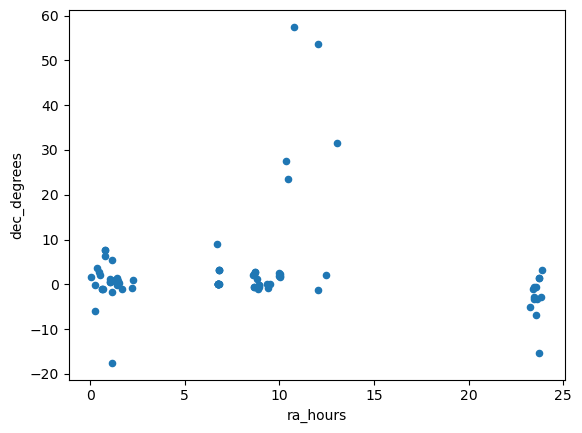

166 unique pointing locations


In [25]:
# Plot the positions of observations on the sky
unique_positions = df[['ra_hours', 'dec_degrees']].drop_duplicates()
unique_positions.plot.scatter("ra_hours", "dec_degrees")
plt.show()
print(f"{unique_positions.size} unique pointing locations")

In [26]:
# Look at how many incoherent, coherent, and phase_center sources we have
incoherent = df["source_name"] == "Incoherent"
tot_incoherent = incoherent.sum()
print("Incoherent:", tot_incoherent)
phase_center = df["source_name"] == "PHASE_CENTER"
tot_phase_center = phase_center.sum()
print("PHASE_CENTER:", tot_phase_center)
coherent = (df["source_name"] != "PHASE_CENTER") & (df["source_name"] != "Incoherent")
tot_coherent = coherent.sum()
print("all coherent:", tot_coherent)
print("Total:", tot_coherent + tot_phase_center + tot_incoherent)
print("Matches:", num_rows)


Incoherent: 6503467
PHASE_CENTER: 21720703
all coherent: 2984740
Total: 31208910
Matches: 31208910


In [27]:
# Get the incoherent points
df_incoherent = df[incoherent]

In [28]:
# Get the coherent points
df_coherent = df[coherent]

In [29]:
# Get the PHASE_CENTER points (coherent not pointed?)
df_phase_center = df[phase_center]

In [30]:
# Check that I understand what beam-id is
# From what I understand, the beam_ids of an observation should be 0-n for n-1 coherent beams and the coherent beam is labeled n
print("all", df["signal_beam"].unique())
print("incoherent", df_incoherent["signal_beam"].unique())
print("coherent", df_coherent["signal_beam"].unique())

all [0 1 2]
incoherent [1 2]
coherent [0 1]


In [31]:
# Seeing only 0 and 1 for the coherent beam means that each observation had either 1 or 2 coherent beams
# The observations with 1 coherent beam had the incoherent beam labeled 1 and those with 2 had it labeled 2

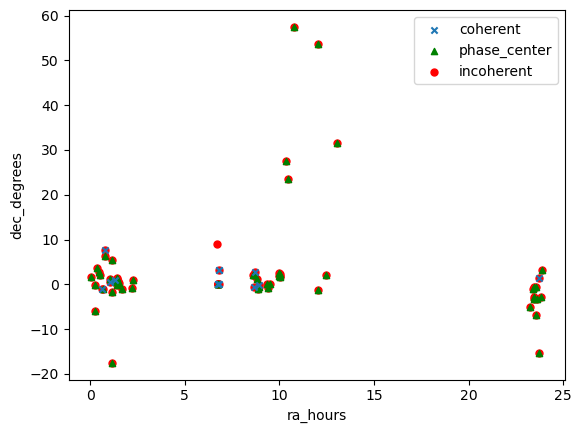

In [32]:
# Plot positions of unique coherent and incoherent sources
# Plot the positions of observations on the sky
coherent_unique_positions = df_coherent[['ra_hours', 'dec_degrees']].drop_duplicates()
ax1 = coherent_unique_positions.plot.scatter("ra_hours", "dec_degrees", marker='x', label="coherent")
phase_center_unique_positions = df_phase_center[['ra_hours', 'dec_degrees']].drop_duplicates()
phase_center_unique_positions.plot.scatter("ra_hours", "dec_degrees", color="green", ax=ax1, zorder=0, label="phase_center", marker="^")
incoherent_unique_positions = df_incoherent[['ra_hours', 'dec_degrees']].drop_duplicates()
incoherent_unique_positions.plot.scatter("ra_hours", "dec_degrees", color="red", ax=ax1, zorder=-1, label="incoherent", s=25)
plt.legend()
plt.show()

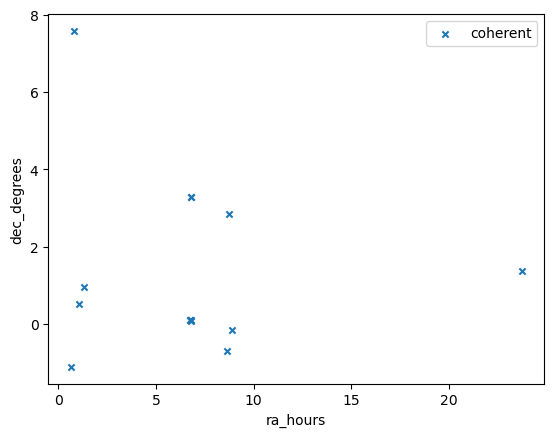

In [33]:
# Plot just the coherent target observations
ax1 = coherent_unique_positions.plot.scatter("ra_hours", "dec_degrees", marker='x', label="coherent")
plt.legend()
plt.show()

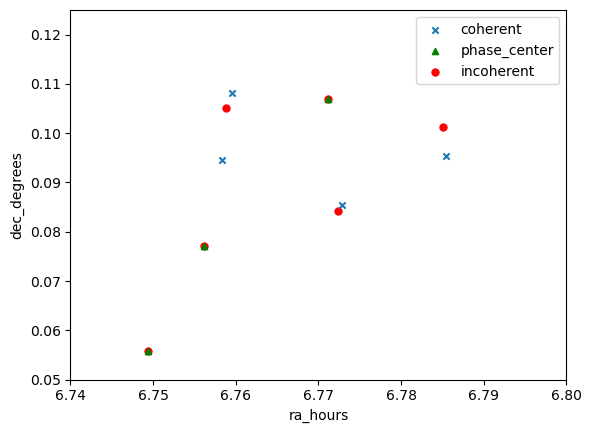

In [34]:
# Plot positions of unique coherent and incoherent sources
# Plot the positions of observations on the sky
# coherent_unique_positions = df_coherent[['ra_hours', 'dec_degrees']].drop_duplicates()
ax1 = coherent_unique_positions.plot.scatter("ra_hours", "dec_degrees", marker='x', label="coherent")
# phase_center_unique_positions = df_phase_center[['ra_hours', 'dec_degrees']].drop_duplicates()
phase_center_unique_positions.plot.scatter("ra_hours", "dec_degrees", color="green", ax=ax1, zorder=0, label="phase_center", marker="^")
# incoherent_unique_positions = df_incoherent[['ra_hours', 'dec_degrees']].drop_duplicates()
incoherent_unique_positions.plot.scatter("ra_hours", "dec_degrees", color="red", ax=ax1, zorder=-1, label="incoherent", s=25)
plt.legend()

# zoom in and look for differences b/w coherent/incoherent pos
plt.xlim([6.74, 6.80]) 
plt.ylim([0.05, 0.125])
plt.show()

In [35]:
# Could try to visualize how big the coherent/incoherent beams are 
# by plotting them ast plt.circle()'s and using the equation for
# beam size at a given wavelength (have to look up config)
# maybe theta = lambda/D? <- maybe found in NRAO tutorials

In [36]:
# Check how many unique pointings there were
print(coherent_unique_positions.shape[0], "unique coherent pointings")
print(phase_center_unique_positions.shape[0], "unique phase center pointings")
print(incoherent_unique_positions.shape[0], "unique incoherent pointings")

14 unique coherent pointings
56 unique phase center pointings
69 unique incoherent pointings


In [37]:
# This kind of makes sense because a lot of the incoherent pointings are clustered, so maybe the target finding algorithm just kept going to the same coherent points?
# Or maybe is there an incoherent beam every time there's a PHASE_CENTER coherent beam?

## Look at frequencies and times

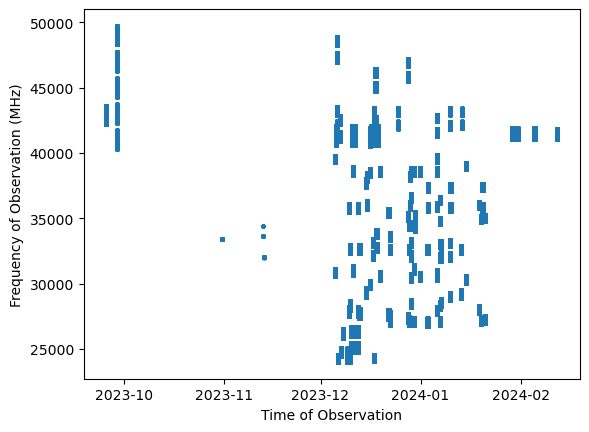

25400816 Unique hits at unique times


In [5]:
# Look at when signals were found and in what frequency
observations_over_time = df[['tstart_h', 'signal_frequency']].drop_duplicates()
observations_over_time.plot.scatter("tstart_h", "signal_frequency", marker=".")
plt.ylabel("Frequency of Observation (MHz)")
plt.xlabel("Time of Observation")
plt.show()
print(observations_over_time.shape[0], "Unique hits at unique times")


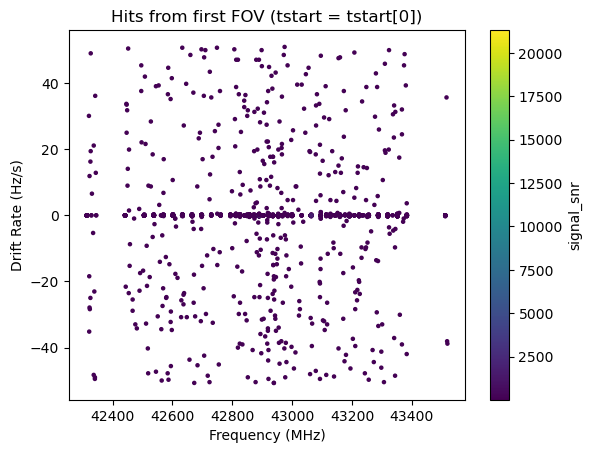

In [9]:
first_time = df[df.tstart == df.tstart[0]]
first_time.plot.scatter("signal_frequency", "signal_drift_rate", c="signal_snr", marker='.')
plt.title("Hits from first FOV (tstart = tstart[0])")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")
# cbar = plt.colorbar(label="SNR")
plt.show()

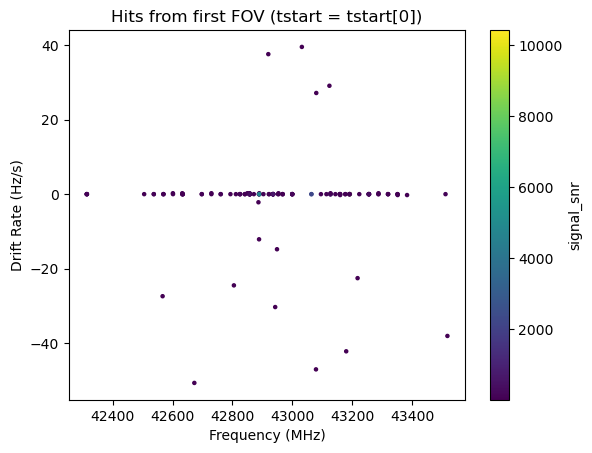

In [10]:
first_time.sample(frac=1/25, random_state=1).plot.scatter("signal_frequency", "signal_drift_rate", c="signal_snr", marker='.')
plt.title("Hits from first FOV (tstart = tstart[0])")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")
# cbar = plt.colorbar(label="SNR")
plt.show()

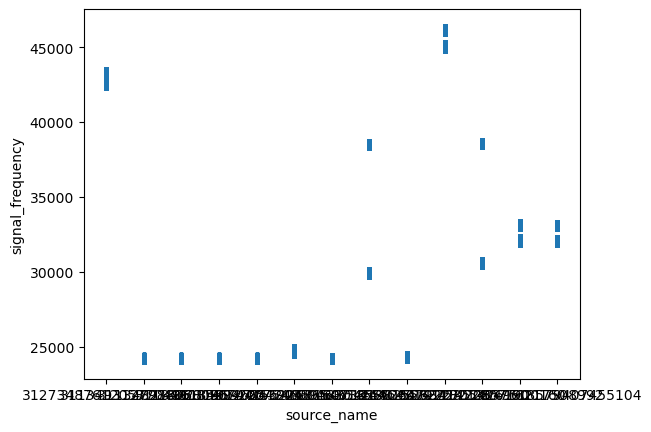

In [39]:
# Plot what frequencies were observed for each target in the coherent beams
df_coherent.plot.scatter("source_name", "signal_frequency", marker=".")
plt.show()

In [40]:
# It's a little bit of a mess, but it looks like there are
# some common frequencies, especially down by 25GHz
# Let's look at frequencies by source and also maybe
# do the same plot but just for smaller sections of the spectrum

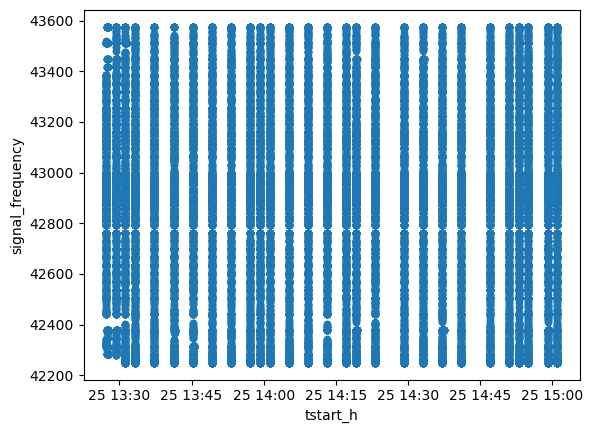

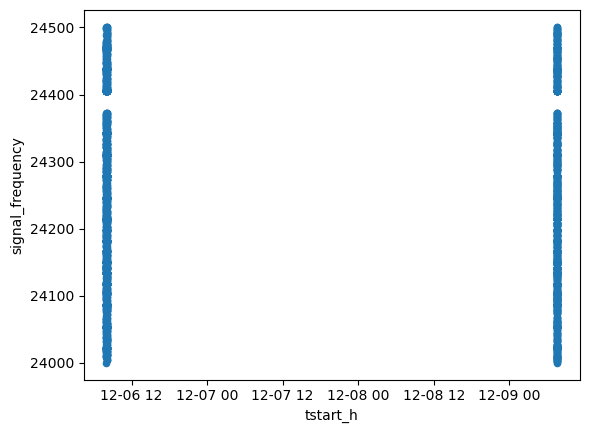

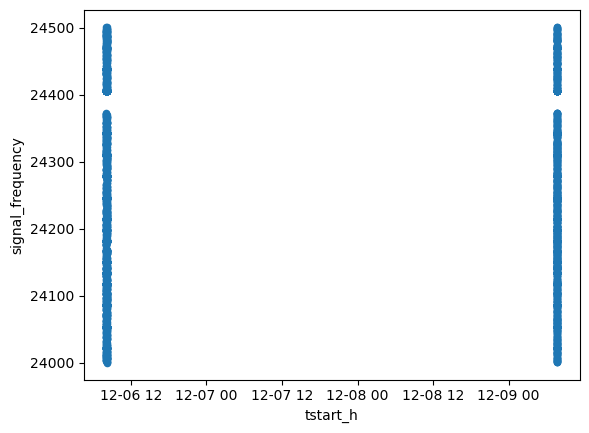

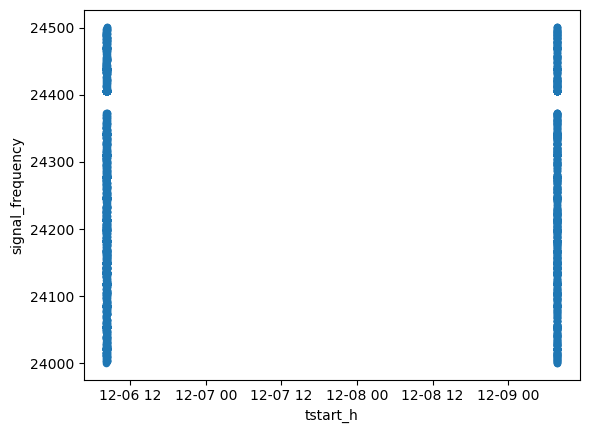

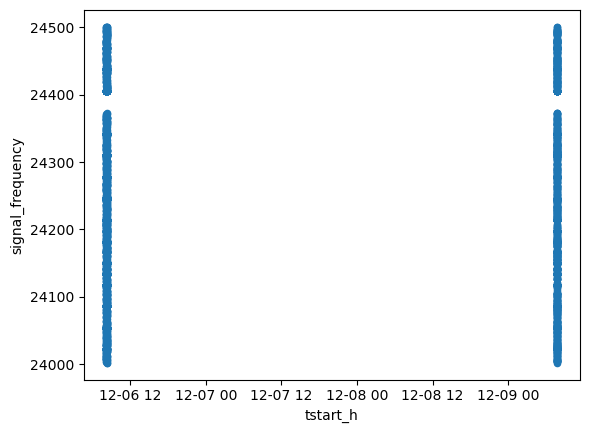

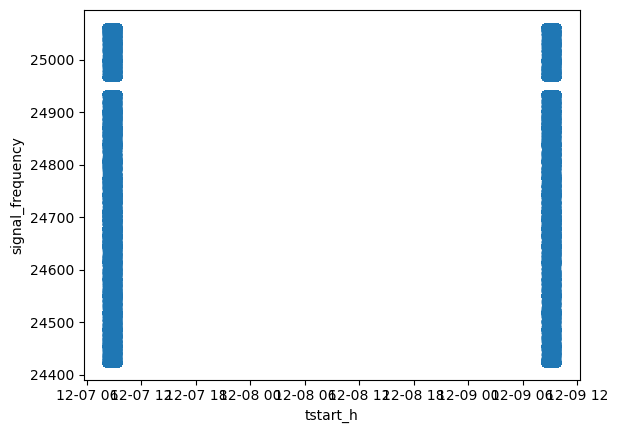

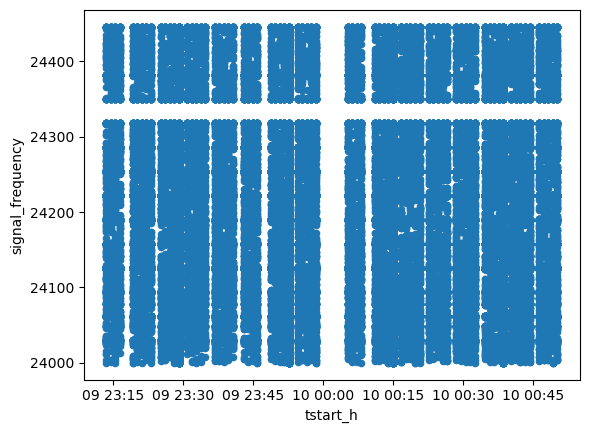

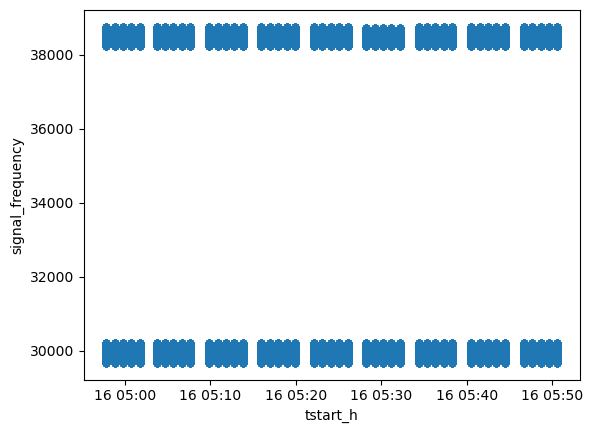

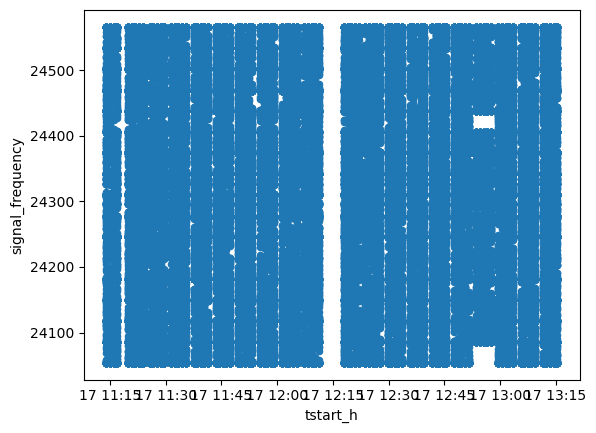

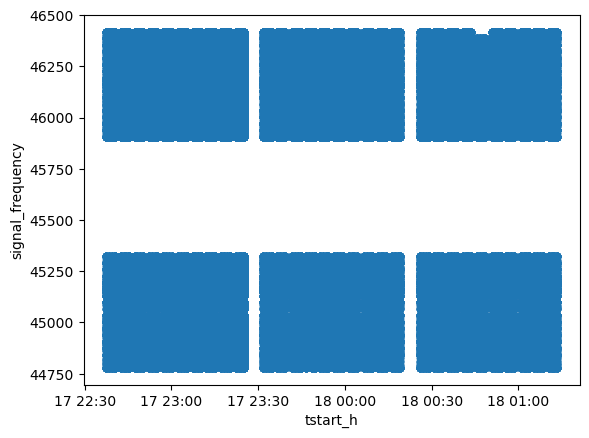

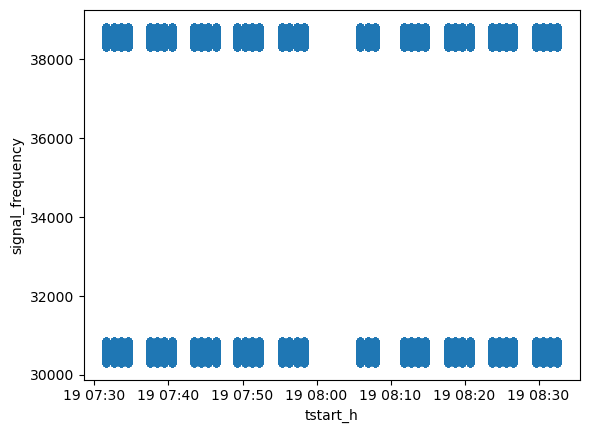

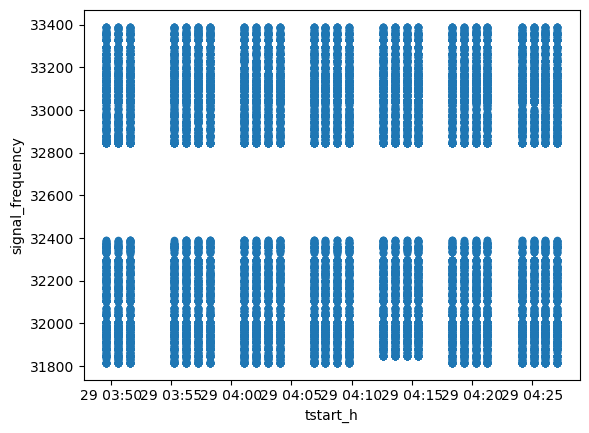

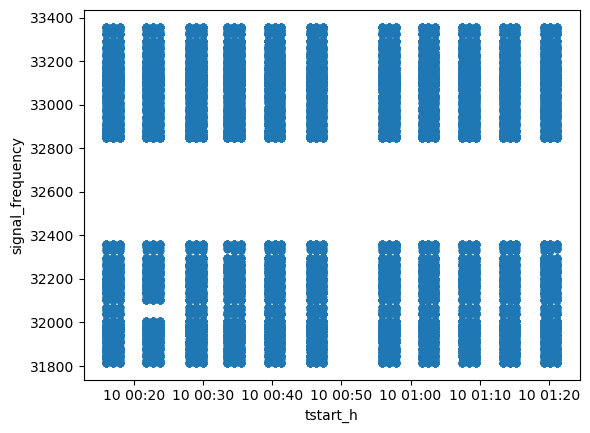

In [41]:
# # Looking at frequencies for each source
# for name in df_coherent["source_name"].unique():
#     frequencies_at_name = df_coherent[df_coherent["source_name"] == name]
#     frequencies_at_name.plot.scatter("tstart_h", "signal_frequency")

## Look at the first hit (by timestamp)

In [6]:
# Try to group observations by when they were taken
by_day = df.groupby("tstart")
by_day.first()

,id,beam_id,observation_id,tuning,subband_offset,file_uri,file_local_enumeration,signal_frequency,signal_index,signal_drift_steps,...,foff_mhz,tsamp,ra_hours,dec_degrees,telescope_id,num_timesteps,num_channels,coarse_channel,start_channel,tstart_h
tstart,,,,,,,,,,,,,,,,,,,,,
60212.560625,900273190,455656,13232,AC,704,/mnt/cosmic-storage-2/data1/vla_target/23A-362...,0,43255.905447,282420,-205,...,0.000002,0.524288,6.789733,3.277760,0,16,284,0,282175,2023-09-25 13:27:17.970905
60212.560661,1034389802,493908,13232,AC,864,/mnt/cosmic-storage-1/data1/batch_processed/23...,0,43415.687539,42043,0,...,0.000008,0.131072,6.789716,3.277763,0,64,79,0,42003,2023-09-25 13:27:21.116694
60212.560758,1034389794,493906,13232,AC,864,/mnt/cosmic-storage-1/data1/batch_processed/23...,0,43415.687539,42043,0,...,0.000008,0.131072,6.789716,3.277763,0,64,79,0,42003,2023-09-25 13:27:29.505262
60212.560855,1034389810,493910,13232,AC,864,/mnt/cosmic-storage-1/data1/batch_processed/23...,0,43415.687539,42043,0,...,0.000008,0.131072,6.789716,3.277763,0,64,79,0,42003,2023-09-25 13:27:37.893790
60212.562064,900276367,455664,13233,AC,704,/mnt/cosmic-storage-2/data1/vla_target/23A-362...,0,43255.712948,181495,-1,...,0.000002,0.524288,6.789733,3.277760,0,16,80,0,181454,2023-09-25 13:29:22.355384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60352.298131,1057339015,508471,19940,AC,736,/mnt/cosmic-storage-2/data3/vla_target/24A-391...,0,41633.148220,182567,-1,...,0.000002,0.524288,10.020139,2.314644,0,16,80,0,182526,2024-02-12 07:09:18.488891
60352.308737,1057341045,508473,19943,AC,480,/mnt/cosmic-storage-2/data3/vla_target/24A-391...,0,41377.096161,155273,0,...,0.000002,0.524288,10.020139,2.314644,0,16,79,0,155233,2024-02-12 07:24:34.887018
60352.310841,1057343074,508475,19944,AC,736,/mnt/cosmic-storage-2/data3/vla_target/24A-391...,0,41633.314947,269980,-33,...,0.000002,0.524288,10.020139,2.314644,0,16,112,0,269907,2024-02-12 07:27:36.628981


In [43]:
# So there are 4703 unique observation times

In [44]:
# So Look at all the hits from a single observation and what beam it's from
first_observation_time = df["tstart"][0]
first_observation_time_h = df["tstart_h"][0]
second_observation_time_h = df["tstart_h"].unique()[1]

print(f"first observation from: {first_observation_time_h}")
print(f"second observation from {second_observation_time_h}")
first_group = by_day.get_group(first_observation_time)
first_group["signal_beam"]

first observation from: 2023-09-25 13:27:17.970905
second observation from 2023-09-25T13:29:22.355384000


0       0
1       0
2       0
3       0
4       0
       ..
3172    1
3173    1
3174    1
3175    1
3176    1
Name: signal_beam, Length: 3177, dtype: int64

In [45]:
# Was this a phase_center or was there one real target in the beam?
first_group["source_name"].unique()
first_group_coherent_target = first_group["source_name"].unique()[0]
print(first_group_coherent_target)

3127348761205770496


In [46]:
# So there was a real target and an incoherent beam

In [47]:
# See how many were coherent/incoherent hits
first_group_coherent_indices = first_group["signal_beam"] == 0
first_group_incoherent_indices = first_group["signal_beam"] == 1
print(first_group_coherent_indices.sum(), "coherent")
print(first_group_incoherent_indices.sum(), "incoherent")

1800 coherent
1377 incoherent


In [48]:
# Could there be multiple hits per beam per FOV?
# I guess I'd assume that this is 3k+ different frequencies within the same exposures
# Let's test this hypothesis
first_group_coherent = first_group[first_group_coherent_indices]
first_group_incoherent = first_group[first_group_incoherent_indices]

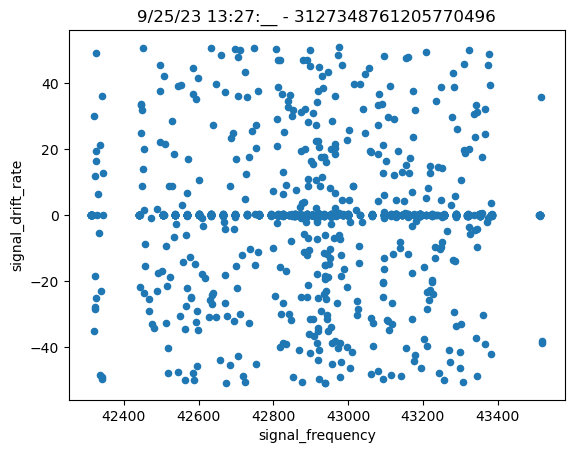

In [49]:
# drift rate vs. f
first_group_coherent.plot.scatter("signal_frequency", "signal_drift_rate")
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.show()

# # drift steps vs. f (matches drift rate)
# first_group_coherent.plot.scatter("signal_frequency", "signal_drift_steps")
# plt.show()


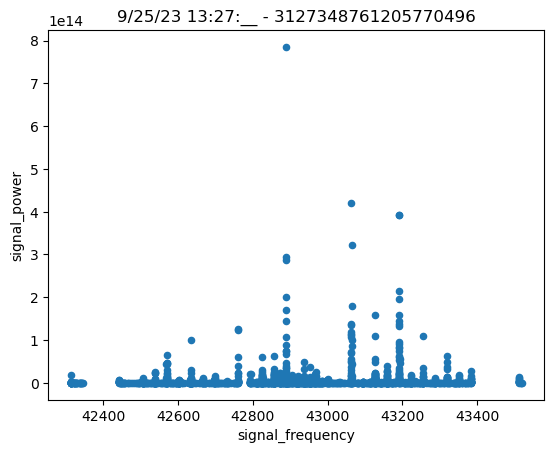

In [50]:
# power vs. f
first_group_coherent.plot.scatter("signal_frequency", "signal_power")
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.show()

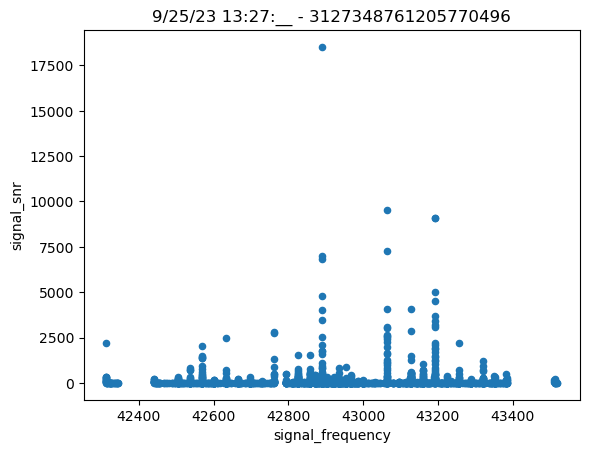

In [51]:
# snr vs. f
first_group_coherent.plot.scatter("signal_frequency", "signal_snr")
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.show()

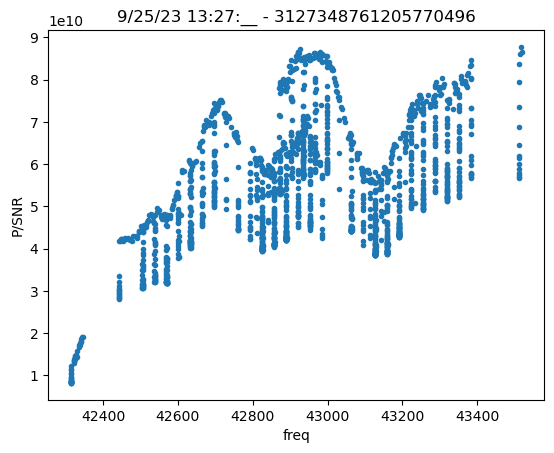

In [52]:
# look at power / SNR ratio
xaxis = first_group_coherent["signal_frequency"]
yaxis = first_group_coherent["signal_power"] / first_group_coherent["signal_snr"]
plt.scatter(xaxis, yaxis, marker=".")
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.xlabel("freq")
plt.ylabel("P/SNR")
plt.show()

In [53]:
# # Look at signal_num_timesteps - all the same?
# first_group_coherent.plot.scatter("signal_frequency", "signal_num_timesteps")
# plt.show()

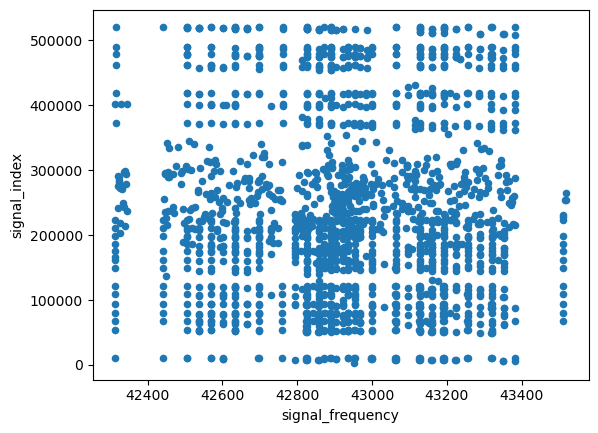

In [54]:
# Look at signal_index - internal number of database?
first_group_coherent.plot.scatter("signal_frequency", "signal_index")
plt.show()

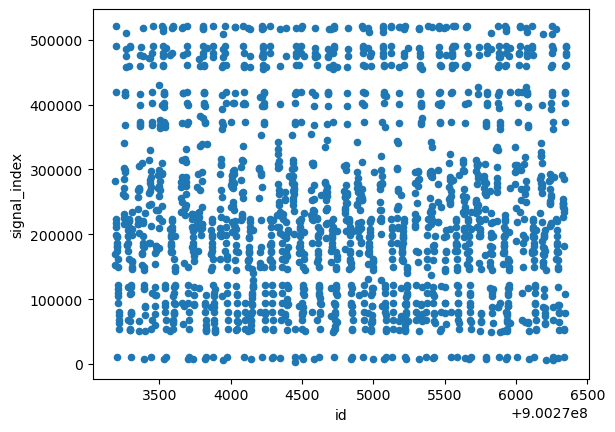

In [55]:
# Look at signal_index - internal number of database?
first_group_coherent.plot.scatter("id", "signal_index")
plt.show()

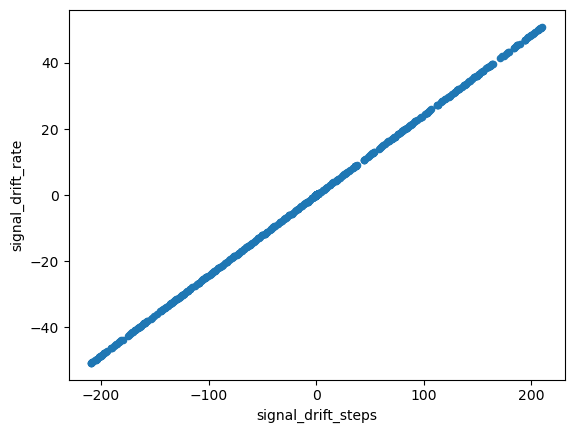

In [56]:
# Look at signal_drift_rate vs. signal_drift_steps
first_group_coherent.plot.scatter("signal_drift_steps", "signal_drift_rate")
plt.show()

In [57]:
# # drift rate vs. signal_coarse_channel - there's some modulo relationship here (32 coarse channels or something)
# first_group_coherent.plot.scatter("signal_frequency", "signal_coarse_channel")
# plt.show()

# # So this is showing the 1 MHz wide coarse channels (note 42800 in the signal_frequency is units of MHz, 42.8GHz)
# # I guess they get modded into 32-wide groups

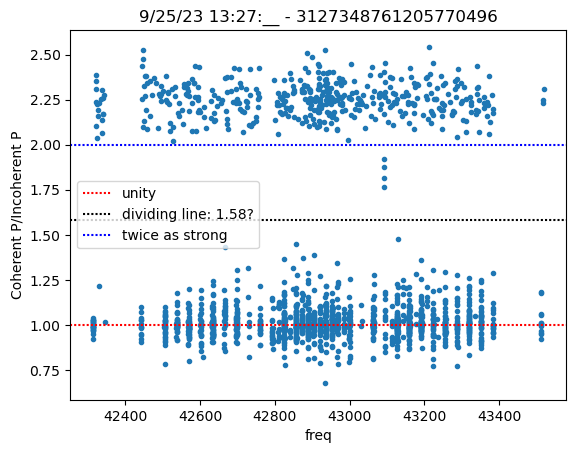

In [58]:
# look at coherent power / incoherent power
# Bimodal distribution?
xaxis = first_group_coherent["signal_frequency"]
yaxis = first_group_coherent["signal_power"] / first_group_coherent["signal_incoherent_power"]
plt.scatter(xaxis, yaxis, marker=".")

# titles
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.xlabel("freq")
plt.ylabel("Coherent P/Incoherent P")

# horizontal lines
plt.axhline(1, dashes=[1, 1, 1, 1], color="red", label="unity") # signal should be stronger than seen in incoherent beam?
divide = 1.58 # What line divides the bimodal distribution?
plt.axhline(divide, dashes=[1, 1, 1, 1], color="black", label=f"dividing line: {divide}?")
plt.axhline(2, dashes=[1, 1, 1, 1], color="blue", label="twice as strong")

plt.legend()
plt.show()


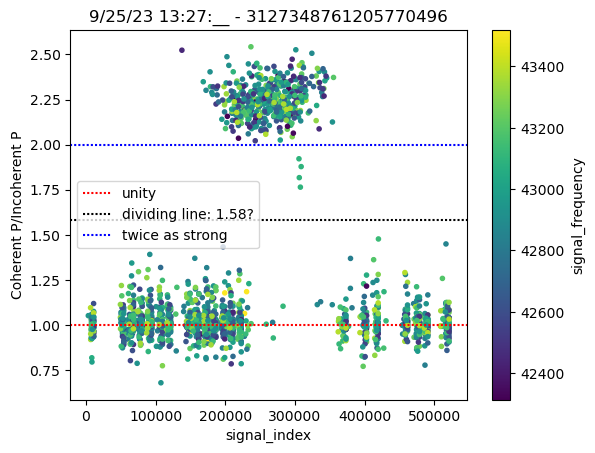

In [59]:
# Coherent power /Incoherent Power but with index as xaxis
# Why is the middle different?
xaxis = first_group_coherent["signal_index"]
yaxis = first_group_coherent["signal_power"] / first_group_coherent["signal_incoherent_power"]
color_by = "signal_frequency"
colors = first_group_coherent[color_by]
plt.scatter(xaxis, yaxis, marker='.', c=colors)

# Colorbar
cbar = plt.colorbar()
cbar.set_label(color_by, rotation=90, labelpad=5)

# labels
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.xlabel("signal_index")
plt.ylabel("Coherent P/Incoherent P")

# horizontal lines
plt.axhline(1, dashes=[1, 1, 1, 1], color="red", label="unity") # signal should be stronger than seen in incoherent beam?
divide = 1.58 # What line divides the bimodal distribution?
plt.axhline(divide, dashes=[1, 1, 1, 1], color="black", label=f"dividing line: {divide}?")
plt.axhline(2, dashes=[1, 1, 1, 1], color="blue", label="twice as strong")

plt.legend()
plt.show()

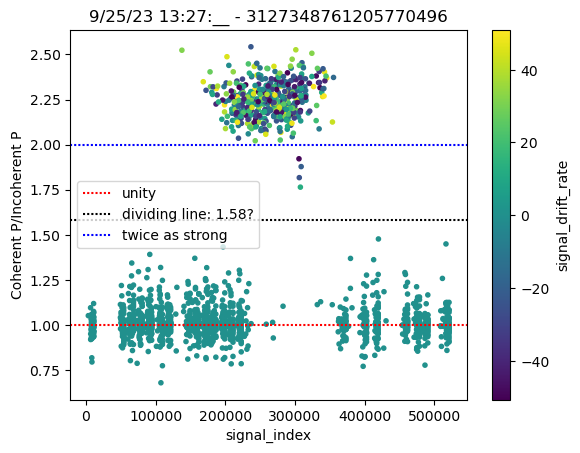

In [60]:
# Coherent power /Incoherent Power but with index as xaxis
# Why is the middle different?
xaxis = first_group_coherent["signal_index"]
yaxis = first_group_coherent["signal_power"] / first_group_coherent["signal_incoherent_power"]
color_by = "signal_drift_rate"
colors = first_group_coherent[color_by]
plt.scatter(xaxis, yaxis, marker='.', c=colors)

# Colorbar
cbar = plt.colorbar()
cbar.set_label(color_by, rotation=90, labelpad=5)

# labels
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.xlabel("signal_index")
plt.ylabel("Coherent P/Incoherent P")

# horizontal lines
plt.axhline(1, dashes=[1, 1, 1, 1], color="red", label="unity") # signal should be stronger than seen in incoherent beam?
divide = 1.58 # What line divides the bimodal distribution?
plt.axhline(divide, dashes=[1, 1, 1, 1], color="black", label=f"dividing line: {divide}?")
plt.axhline(2, dashes=[1, 1, 1, 1], color="blue", label="twice as strong")

plt.legend()
plt.show()

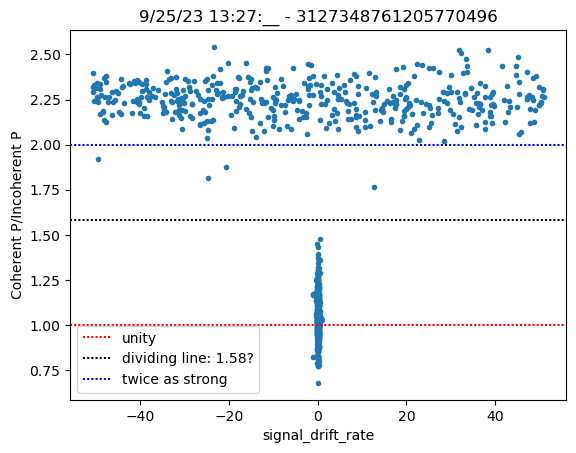

In [61]:
# Coherent power /Incoherent Power with drift rate as x axis
xaxis = first_group_coherent["signal_drift_rate"]
yaxis = first_group_coherent["signal_power"] / first_group_coherent["signal_incoherent_power"]
plt.scatter(xaxis, yaxis, marker=".")

# labels
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.xlabel("signal_drift_rate")
plt.ylabel("Coherent P/Incoherent P")

# horizontal lines
plt.axhline(1, dashes=[1, 1, 1, 1], color="red", label="unity") # signal should be stronger than seen in incoherent beam?
divide = 1.58 # What line divides the bimodal distribution?
plt.axhline(divide, dashes=[1, 1, 1, 1], color="black", label=f"dividing line: {divide}?")
plt.axhline(2, dashes=[1, 1, 1, 1], color="blue", label="twice as strong")

plt.legend()
plt.show()

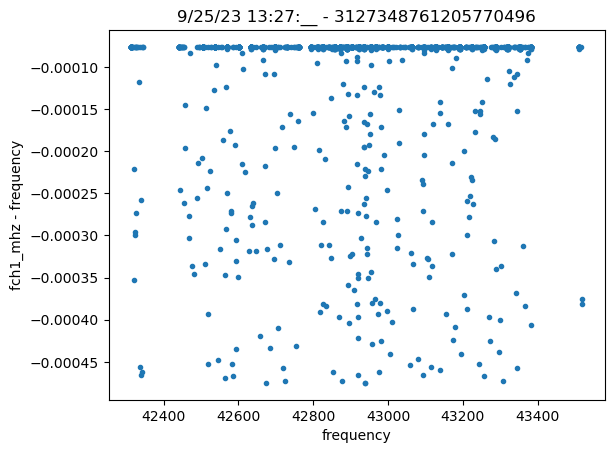

In [62]:
# How are signal_frequency and fch1_mhz related?
# first_group_coherent.plot.scatter("signal_frequency", "fch1_mhz")
xaxis = first_group_coherent["signal_frequency"]
yaxis = first_group_coherent["fch1_mhz"] - first_group_coherent["signal_frequency"]
plt.scatter(xaxis, yaxis, marker=".")

# labels
plt.title(f"9/25/23 13:27:__ - {first_group_coherent_target}")
plt.xlabel("frequency")
plt.ylabel("fch1_mhz - frequency")


plt.show()

# fch1_mhz is the coarse channel (1MHz from COSMIC, 32 per compute node). Is it the edge or the center of the 1 MHz coarse channel bin
# 

In [63]:
# Look at what beam_id is - for some reason it's not the same across beams? alternates?
print(first_group_incoherent["beam_id"].unique())
print(first_group_coherent["beam_id"].unique())

[455657 455659 455661 455663]
[455656 455658 455660 455662]


In [91]:
# first_group_coherent.head()
print(first_group_coherent[["id", "beam_id", "observation_id"]].iloc[0])
print(first_group_coherent["file_uri"][0])

id                900273190
beam_id              455656
observation_id        13232
Name: 0, dtype: int64
/mnt/cosmic-storage-2/data1/vla_target/23A-362.sb43789194.eb44583327.60212.544836180554/23A-362.sb43789194.eb44583327.60212.544836180554.9.1/23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.raw.seticore.hits


There are 4 unique values for signal_num_timesteps:
[16  8  4 64]


In [65]:
# Group by the time the observation started and what the beam was
# gdf = df.groupby(["tstart", "signal_beam"])
# gdf.first() # Look at all the first hits from tstart x and beam y
# gdf.get_group((df["tstart"][0], 0)) # Look at all the hits from tstart _first_ and beam 0

## Investigate hit clusters

In [6]:
# So I think that seticore might be making hits of the same signal multiple times, so I'm going to see if I
# can focus in on one region of the spectrum from one observation and figure out if it's happening or not
by_day = df.groupby("tstart")
first_observation_time = df["tstart"][0]
first_group = by_day.get_group(first_observation_time)
first_group_coherent_indices = first_group["signal_beam"] == 0
first_group_coherent = first_group[first_group_coherent_indices]
print(first_group_coherent["source_name"].unique())
assert(len(first_group_coherent["source_name"].unique()) == 1) # Make sure all from 1 source

['3127348761205770496']


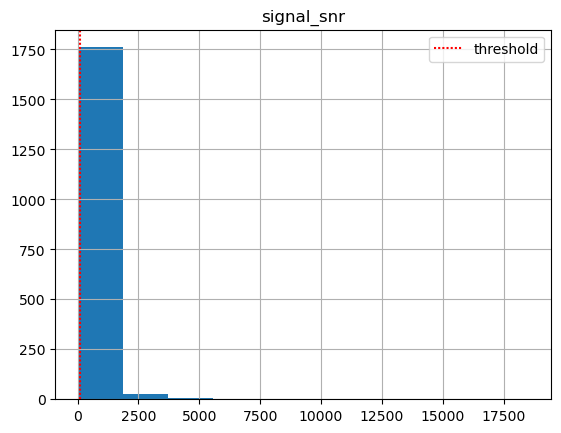

Cut 1800 to 1390


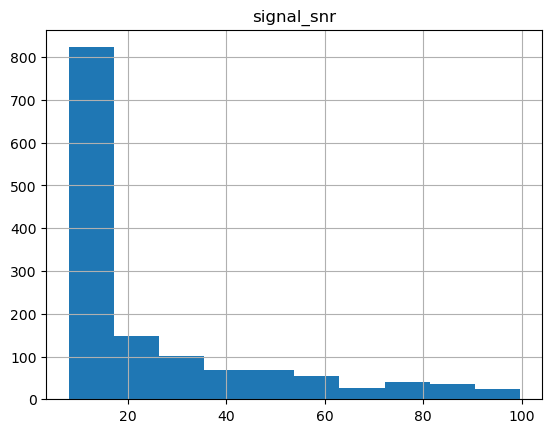

In [36]:
# I'll define a subset with just reasonably low SNR
threshold = 100
first_group_coherent.hist("signal_snr")
plt.axvline(threshold, dashes=[1, 1, 1, 1], color="red", label="threshold")
plt.legend()
plt.show()
first_coherent_weak = first_group_coherent[first_group_coherent["signal_snr"] < threshold]
print(f"Cut {len(first_group_coherent)} to {len(first_coherent_weak)}")
first_coherent_weak.hist("signal_snr")
plt.show()

<Axes: xlabel='signal_frequency', ylabel='signal_drift_rate'>

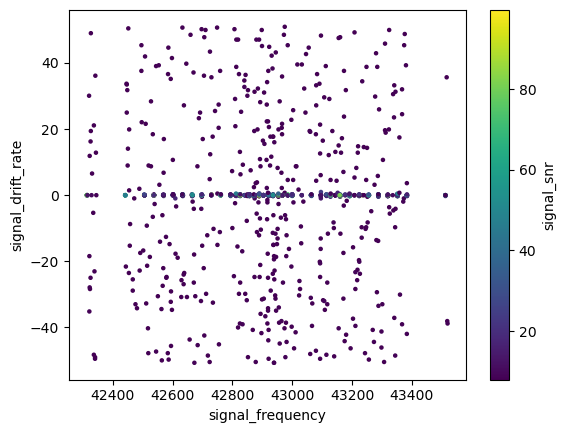

In [70]:
# First, I'll do a scatter plot to see if these hits are clumping in drift_rate vs. frequency space
first_coherent_weak.plot.scatter("signal_frequency", "signal_drift_rate", c="signal_snr", marker='.')


<Axes: xlabel='signal_frequency', ylabel='signal_drift_rate'>

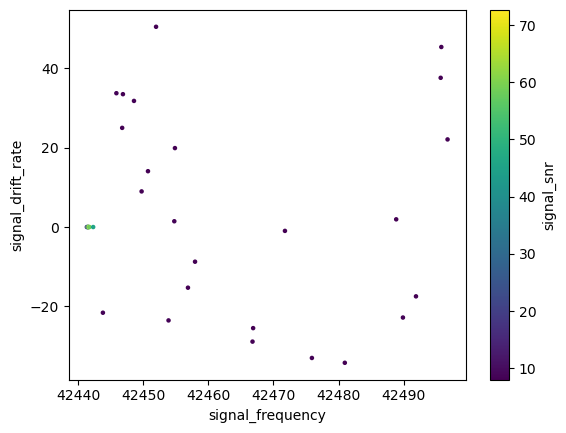

In [38]:
# I'll zoom into the region I'm looking at
small_area = first_coherent_weak[(first_coherent_weak["signal_frequency"] < 42500) &
                                 (first_coherent_weak["signal_frequency"] > 42440)]
small_area.plot.scatter("signal_frequency", "signal_drift_rate", c="signal_snr", marker='.')


/tmp/ipykernel_2258312/1534375156.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tiny_area = small_area[(first_coherent_weak["signal_frequency"] < 42443) &


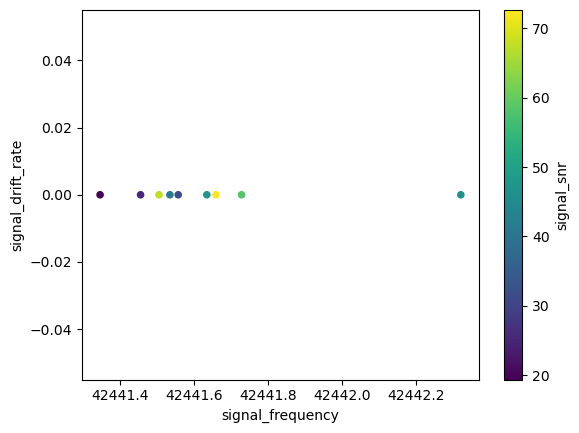

In [59]:
# I do see a cluster right around 42440 and 0
tiny_area = small_area[(first_coherent_weak["signal_frequency"] < 42443) &
                                 (first_coherent_weak["signal_frequency"] > 42440)]
tiny_area.plot.scatter("signal_frequency", "signal_drift_rate", c="signal_snr")
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

In [57]:
# Remembering that the frequency resolution is 2-8hz
print(tiny_area["foff_mhz"].iloc[0] * 1e6) # about 2 hz per channel
print(tiny_area["fch1_mhz"].iloc[0] * 1e6) # starting at 42,441,346,314.19754 hz

1.9073486328125
42441346314.19753


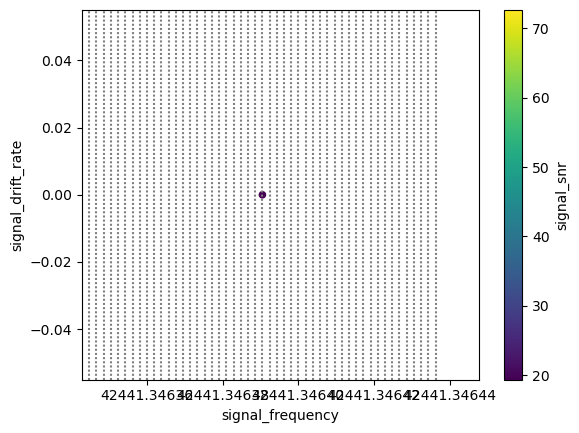

In [69]:
# Let's look at where the channels actually are
# And remember the FFT can mess with this and bump things around a channel
# or two
num_channels_shown = 50
tiny_area.plot.scatter("signal_frequency", "signal_drift_rate", c="signal_snr")
plt.ticklabel_format(style='plain', useOffset=False)
for i in range(num_channels_shown):
    offset = tiny_area["fch1_mhz"].iloc[0] + (i + 15) * tiny_area["foff_mhz"].iloc[0]
    plt.axvline(offset, dashes=[1, 1, 1, 1], color="grey")

plt.xlim([tiny_area["fch1_mhz"].iloc[0] + 15 * tiny_area["foff_mhz"].iloc[0], 
          tiny_area["fch1_mhz"].iloc[0] + (num_channels_shown + 20) * tiny_area["foff_mhz"].iloc[0]])
plt.show()

In [ ]:
# Wow OK so even the closest two points aren't really even in the same bin at all

## Reconstruct waterfall plot

/tmp/ipykernel_2258312/365265664.py:58: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=normalize))


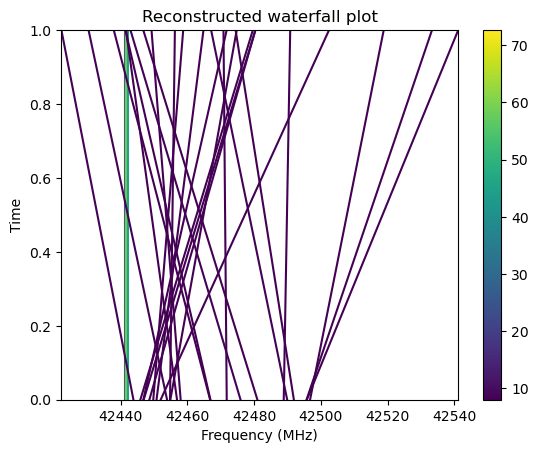

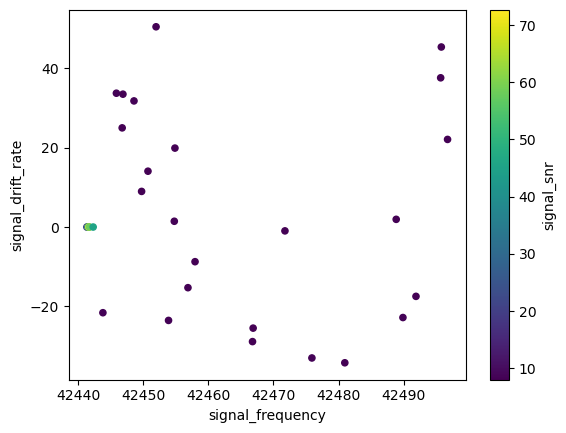

In [154]:
# Maybe if I plot them as lines in time-frequency that'll be more helpful?
# Basically make a reconstructed waterfall plot
df_to_plot = small_area
max_time = 1 # Time starts at 0 and goes to max_time (y axis)
inverse_slopes = df_to_plot["signal_drift_rate"].to_numpy() # this is run / rise
points = df_to_plot["signal_frequency"].to_numpy() # @ t = 0 (y = 0) & x = f
intensities = df_to_plot["signal_snr"].to_numpy()

# Theory of a line
# y - y1 = m*(x - x1)
# y1 = 0
# x1 = f
# m = 1 / drift_rate = 1 / dr

# Define a colormap for the lines
cmap = plt.colormaps['viridis']  # Choose a colormap (e.g., 'viridis')
normalize = plt.Normalize(vmin=min(intensities), vmax=max(intensities))  

# Keep track of minimum and maximum x seen so far
min_x = np.inf
max_x = -np.inf

# Plot all the lines
for i, inverse_slope in enumerate(inverse_slopes):
    # Calculate the slope of this line in xy space
    slope = 1 / inverse_slope if inverse_slope != 0 else None # Check for vertical line (div by 0)
    intensity = intensities[i] # For color
    point = points[i] # Point at t=0
    # Figure out for each line at what x value it hits y = 8s
    # x = 8 / dr + f
    ending = max_time / slope + point if slope != 0 and slope != None else None

    # Create an x axis for the line to plot it 
    xaxis = np.linspace(point, ending, num=100) if ending != None else None
    
    # Update min/max x
    if type(xaxis) != type(None):
        if min(xaxis) < min_x:
            min_x = min(xaxis)
        if max(xaxis) > max_x:
            max_x = max(xaxis)

    # Plot the line
    if type(xaxis) != type(None):
        plt.plot(xaxis, slope * (xaxis - point), color=cmap(normalize(intensity)))
    else:
        # If the drift rate is 0, then it's a vertical line
        plt.axvline(point, color=cmap(normalize(intensity)))

# Label axes and title
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time (s)")
plt.title("Reconstructed waterfall plot")

# Figure out axes limits
if min_x != np.inf and max_x != -np.inf:
    plt.xlim([min_x, max_x])
else:
    plt.xlim([min(points) - 0.1, max(points) + 0.1])
plt.ylim([0, max_time])

# Finalize plot
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=normalize))
plt.show()

# Make scatterplot for comparison
df_to_plot.plot.scatter("signal_frequency", "signal_drift_rate", c="signal_snr")
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

In [142]:
a = np.inf
array = [0, 1, 2]
if max(array) < a:
    a = min(array)

print(a)

0


In [120]:
max(slope * (xaxis - point))

8.000000000000071

In [123]:
slopes = [1 / slope if slope != 0 else None for slope in inverse_slopes]

In [124]:
print(slopes)

[None, None, None, None, None, None, None, None, None, -0.04632773712539325, 0.029663083483165462, 0.04003076314718446, 0.02987803336347826, 0.03147456949740458, 0.1114369893016216, 0.07108911386482758, 0.01982292598153846, -0.04250689282639175, 0.68719476736, 0.05028254395317073, -0.06544712070095238, -0.11453246122666666, -0.03464847566521008, -0.039268272420571425, -1.03079215104, -0.030317416207058818, -0.029242330525957448, 0.51539607552, -0.04386349578893617, -0.05726623061333333, 0.026601087768774193, 0.02204902996877005, 0.04530954510065934]


In [112]:
xaxis

In [139]:
1 < np.inf

True

## Misc

In [66]:
# Look to see if the SIMBAD database and the GAIA match up
print(df[["ra_hours", "dec_degrees"]].iloc[0])
df["source_name"][0]

ra_hours       6.789733
dec_degrees    3.277760
Name: 0, dtype: float64


'3127348761205770496'

Text(0, 0.5, 'Power / SNR')

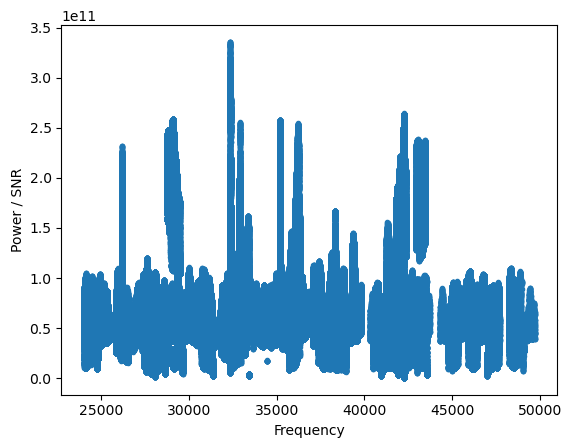

In [4]:
# Look at the power / SNR vs Frequency for all data
xaxis = df["signal_frequency"]
yaxis = df["signal_power"] / df["signal_snr"]
plt.scatter(xaxis, yaxis, marker=".")
plt.xlabel("Frequency")
plt.ylabel("Power / SNR")

In [15]:
# Look at first 4 elements in the dataset and the last one to pull stamp files
ids = [900273190, # First 4 IDs df["id"][0:4]
       900273191,
       900273192,
       900273193,
       1034777916] # last ID df["id"].iloc[-1]

pd.set_option('display.max_colwidth', None)
for id in ids:
    index = df["id"] == id
    item = df[index]
    print(item["file_uri"])
    print(item["file_local_enumeration"])


0    /mnt/cosmic-storage-2/data1/vla_target/23A-362.sb43789194.eb44583327.60212.544836180554/23A-362.sb43789194.eb44583327.60212.544836180554.9.1/23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.raw.seticore.hits
Name: file_uri, dtype: object
0    0
Name: file_local_enumeration, dtype: int64
1    /mnt/cosmic-storage-2/data1/vla_target/23A-362.sb43789194.eb44583327.60212.544836180554/23A-362.sb43789194.eb44583327.60212.544836180554.9.1/23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.raw.seticore.hits
Name: file_uri, dtype: object
1    1
Name: file_local_enumeration, dtype: int64
2    /mnt/cosmic-storage-2/data1/vla_target/23A-362.sb43789194.eb44583327.60212.544836180554/23A-362.sb43789194.eb44583327.60212.544836180554.9.1/23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.raw.seticore.hits
Name: file_uri, dtype: object
2    2
Name: file_local_enumeration, dtype: int64
3    /mnt/cosmic-storage-2/data1/vla_target/23A-362.sb43789194.eb44583

In [16]:
# Stamp files don't have database IDs, so I have to ID by the signal_frequency
# Copy-pasting these over
print(df["signal_frequency"][0])
print(df["signal_frequency"][1])
print(df["signal_frequency"][2])
print(df["signal_frequency"][3])
print(df["signal_frequency"].iloc[-1])

43255.9054468941
43255.65711010211
43255.68989742511
43256.36075199359
41792.71310024261


In [7]:
# Look at minimum nonzero drift rate in the data
nonzero_drift_rate = df["signal_drift_rate"] != 0
print("There are", sum(nonzero_drift_rate), "/", len(df), "hits with nonzero drift rate")
print("The minimum nonzero drift rate is", df[nonzero_drift_rate]["signal_drift_rate"].abs().min(), "Hz/s")

There are 19671512 / 31208910 hits with nonzero drift rate
The minimum nonzero drift rate is 0.24253192047278088 Hz/s


In [6]:
df["foff_mhz"].abs().min() * 1e6

1.9073486328125

In [8]:
# Check if the sets of frequencies which are closer in
# frequency than the frequency resolution in observation 1 time 1 
# are seticore detecting the same signal in the overlapping region
# of the local oscillators
id_pairs = [[900273311, 900274434],
       [900273349, 900274437],
       [900274211, 900274328]]

# Print out the LO each signal was from
# Expect to see three pairs of AC and BD
for pair in id_pairs:
    ind_0 = df["id"] == pair[0]
    ind_1 = df["id"] == pair[1]
    print(df["tuning"][ind_0])
    print(df["tuning"][ind_1])

121    AC
Name: tuning, dtype: object
1244    BD
Name: tuning, dtype: object
159    AC
Name: tuning, dtype: object
1247    BD
Name: tuning, dtype: object
1021    BD
Name: tuning, dtype: object
1138    AC
Name: tuning, dtype: object
